This was **part** of a simple model using PDE to simulate bacteria running away from a toxic source. Here we take into consideration factors such as bacterial logistic growth, competition, diffusivity of the bacteria, diffusivity of the toxine, chemotaxis, different environment sizes, injection positions and rates. 


In [2]:
import numpy as np
import scipy.stats as st
from tqdm import tqdm
import random
from matplotlib import pyplot as pt
import plotly.express as px


In [11]:
def simulation(xb, xq, xmax, Db, Dq, tmax, rb, chi, lamb, quimico, m):
  inicioq = np.zeros(xmax) #initial condition for the toxine (it will only be added at xq)
  iniciob = [xb + np.random.uniform() for i in range(xmax)] #initial condition for the bacteria
  nx = 100 #number of steps within the whole simulation
  p = xmax/nx 
  deltaT = p**2 / (64*Db)
  t = np.arange(0, tmax, deltaT)

  #initial lists to append the scenarios for bacteria and the chemical substance, respectively
  simulacb = [iniciob]
  simulacq = [inicioq]

  for i in range(tmax): #i in time for lines of the final graph
    rho = simulacb[-1] #list of bacteria concentrations per point
    s = simulacq[-1] #list of toxine concentrations per point
    
    listab = [] #iterations list in space
    listaq = [] #iterations list in space (toxine)

    for j in range(xmax): #j in space for columns of the final graph
      if j == 0: #border conditions, values in the border will simply repeat the values of the next/previous points

        bac = rho[j+1]
        qui = s[j+1]

        listab.append(bac)
        listaq.append(qui)

      elif j == xmax-1:
      
        bac = rho[j-1]
        qui = s[j-1]

        listab.append(bac)
        listaq.append(qui)

      else:
        
        morte = lamb * m * s[j] * rho[j] #death of bacteria caused by the m parameter multiplied by the concentration of chemical substance and bacteria concentration
        
        diffusion = Db * ((rho[j+1]-2*rho[j]+rho[j-1])/p**2) #bacterial diffusion
        growth = rb * rho[j] - rb/kb * rho[j]**2 #bacterial logistic growth
        quimio = chi * ((((rho[j+1]-rho[j])-(s[j+1]-s[j]))/p*2) + rho[j] * ((s[j+1]-2*s[j]+s[j-1])/p**2)) - morte #chemotaxis


        bac = rho[j] + deltaT * (diffusion + growth + quimio) #complete bacterial dynamics
        
        qui = s[j] + deltaT * (Dq * ((s[j+1]-2*s[j]+s[j-1])/p**2) - (lamb * s[j])) #(toxine difusivity) - (spontaneous degradation)
        listab.append(bac)



        if j == xq: #define that the toxine will only be injected in a certain point (xq)
          qui = xq + s[j] + deltaT * Dq * (((s[j+1]-2*s[j]+s[j-1])/p**2) - (lamb * s[j]))
          
        if i > quimico: #defines moment in time that the toxine injection starts
          listaq.append(qui)
        else:
          listaq.append(0)

    simulacb.append(listab)
    simulacq.append(listaq)
  
  return simulacb, simulacq #returns both values for both bacterial and toxine concentrations throughout time and space 


In [31]:
#some values for our parameters

xb = 10 #initial number of bacteria (will be used with np.random to create a variable initial condition)
xmax = 30 #total size of environment
Db = 1E-2 #diffusivity of bacteria
tmax = 100 #total time of simulation
rb = 2 #intrinsic rate of population growth
kb = 5E2 #carrying capacity
xq = 20 #initial position in space for chemical injection
Dq = 2.5E-2 #diffusivity of the toxine
chi = 1.6E-3 #how toxine presence affects chemotactical behavior
lamb = 5E-2 #chemical uptake by the bacteria
quimico = 30 #initial moment for chemical injection
m = 5E-2 #normal bacteria death


imagem = simulation(xb, xq, xmax, Db, Dq, tmax, rb, chi, lamb, quimico, m)


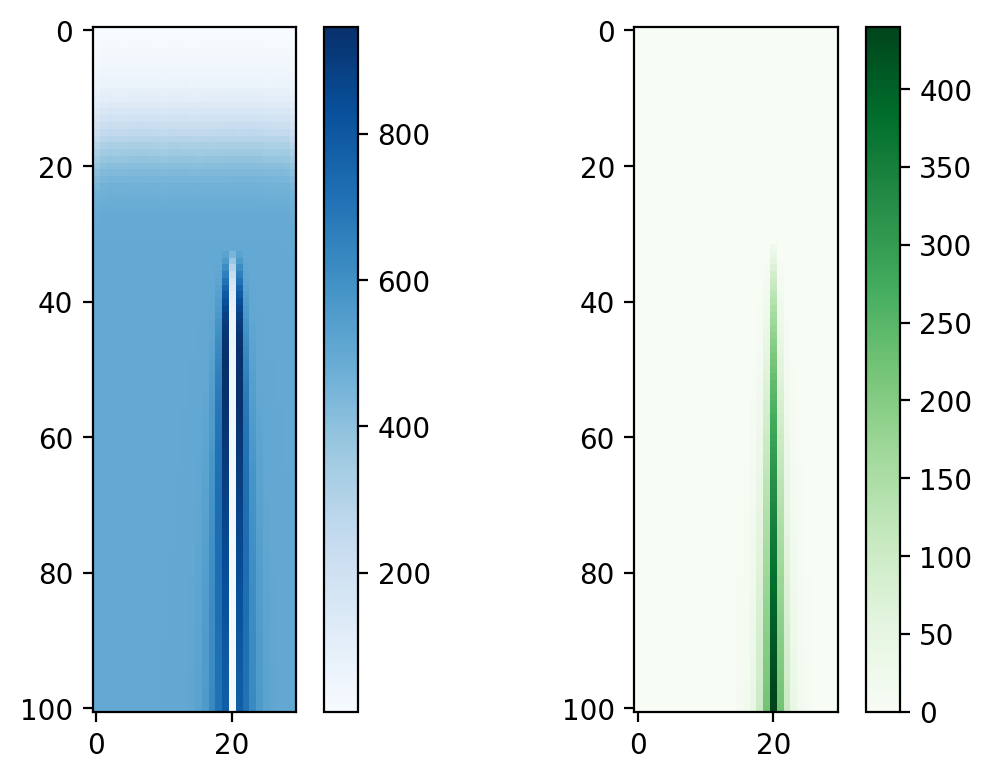

In [34]:
#plot of final concentration of bacteria (in blue) and toxine (in green)
fig, ax = pt.subplots(1, 2, dpi = 200)
img = ax[0].imshow(imagem[0], cmap = 'Blues')
pt.colorbar(img, ax = ax[0])

img2 = ax[1].imshow(imagem[1], cmap = 'Greens')
fig.colorbar(img2, ax = ax[1])

pt.tight_layout()
pt.show()